In [1]:
reset -fs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import Image, display
%matplotlib inline

# Load Kaggle CSV file from local dir 

In [4]:
path = "/Users/adamszabunio/DSCI6002-student/week_8/8_2_final_project"
forest = pd.read_csv(path + "/covtype.csv")

forest.shape

(581012, 55)

In [5]:
forest.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [6]:
pd.set_option("display.max_columns", forest.shape[1])
forest.columns = [col.lower() for col in forest.columns]

forest.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_area1,wilderness_area2,wilderness_area3,wilderness_area4,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [7]:
forest.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,wilderness_area1,wilderness_area2,wilderness_area3,wilderness_area4,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# Checking for NaN values
## Nice clean dataset with no missing values

In [8]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
elevation                             581012 non-null int64
aspect                                581012 non-null int64
slope                                 581012 non-null int64
horizontal_distance_to_hydrology      581012 non-null int64
vertical_distance_to_hydrology        581012 non-null int64
horizontal_distance_to_roadways       581012 non-null int64
hillshade_9am                         581012 non-null int64
hillshade_noon                        581012 non-null int64
hillshade_3pm                         581012 non-null int64
horizontal_distance_to_fire_points    581012 non-null int64
wilderness_area1                      581012 non-null int64
wilderness_area2                      581012 non-null int64
wilderness_area3                      581012 non-null int64
wilderness_area4                      581012 non-null int64
soil_type1                            581012 non-

# Creating subsets for selected features

In [9]:
soil = [col for col in forest.columns if "soil" in col] # 40 soil types
wilderness_types = [col for col in forest.columns if "wilderness" in col] # 40 wilderness area

continuous_features = [col for col in forest.columns if col not in soil + wilderness_types] 
continuous_features # includes the target col ("cover_type")

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'vertical_distance_to_hydrology',
 'horizontal_distance_to_roadways',
 'hillshade_9am',
 'hillshade_noon',
 'hillshade_3pm',
 'horizontal_distance_to_fire_points',
 'cover_type']

In [10]:
#remove the 40 soil_type columns and 4 wilderness area columns 
forest_select_features = forest[continuous_features]
forest_select_features.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


# Create a target column for predictions (cover types)

In [11]:
target = [continuous_features.pop()] # remove "cover_type" from the continous features 
target # change to list for list wise operations later

['cover_type']

# Heavy Class Imbalance

In [12]:
forest_select_features.cover_type.value_counts(sort=False)

1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: cover_type, dtype: int64

In [13]:
tree_dict = {1 : 'Spruce / Fir',
             2 : 'Lodgepole Pine',
             3 : 'Ponderosa Pine',
             4 : 'Cottonwood / Willow',
             5 : 'Aspen',
             6 : 'Douglas-fir',
             7 : 'Krummholz'}

tree_val = [v for v in tree_dict.values()] # Save Cover Type dictionary vlaues for better plotting

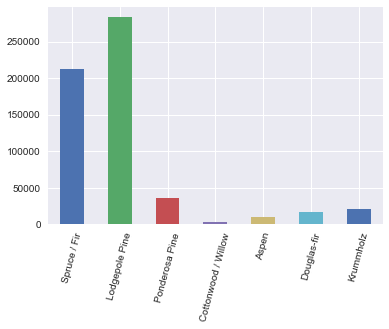

In [14]:
forest.cover_type.value_counts(sort=False).plot(kind='bar').set_xticklabels(tree_val, rotation=75);

# Load Images from local and internet (for presentation)

Spruce / Fir


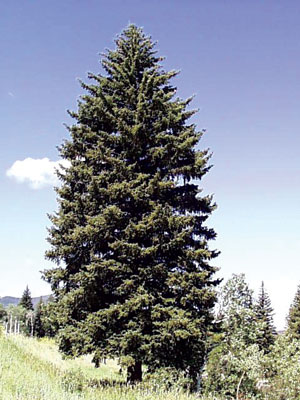

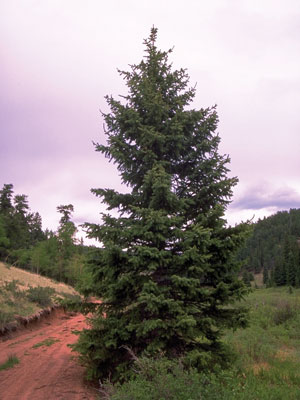

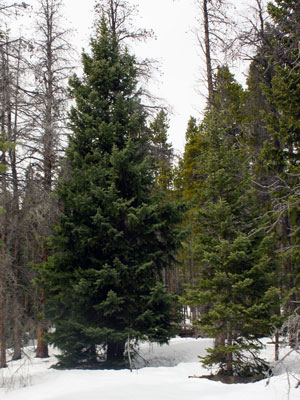

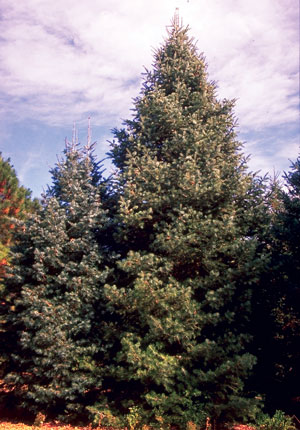

In [15]:
print(tree_dict[1])
#Blue Spruce
#Picea pungens
a = Image(filename="images/blue-spruce-tree.jpg")
#Engelmann Spruce
#Picea engelmannii
b = Image(filename="images/Eng-Spruce-tree.jpg")
#Subalpine Fir
#Abies lasiocarpa
c = Image(filename="images/Subalpine-fir-tree.jpg")
#White Fir
#Abies concolor
d = Image(filename="images/White-Fir-tree.jpg")
display(a, b, c, d)

Lodgepole Pine


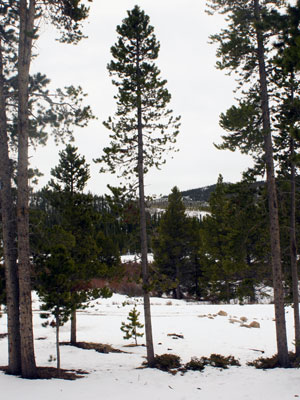

In [16]:
print(tree_dict[2])
#Pinus contorta
Image("http://csfs.colostate.edu/media/sites/22/2014/02/lodgepole-tree2.jpg")

Ponderosa Pine


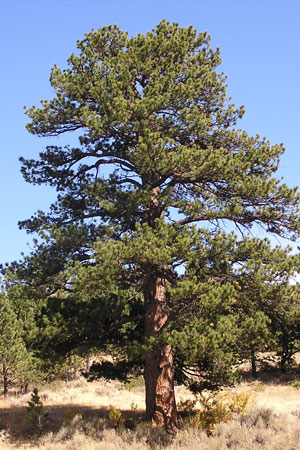

In [17]:
print(tree_dict[3])
#Pinus ponderosa
Image("http://csfs.colostate.edu/media/sites/22/2014/02/ponderosa-tree-modern.jpg")

Cottonwood / Willow


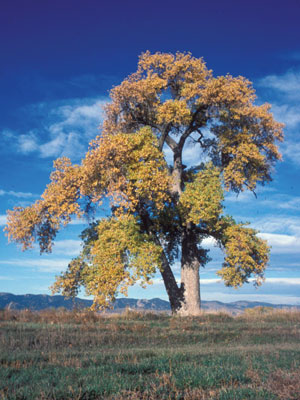

In [18]:
print(tree_dict[4])
#Plains Cottonwood
#Populus deltoides

Image("http://csfs.colostate.edu/media/sites/22/2016/04/Plains-Cotton-tree.jpg")

Aspen


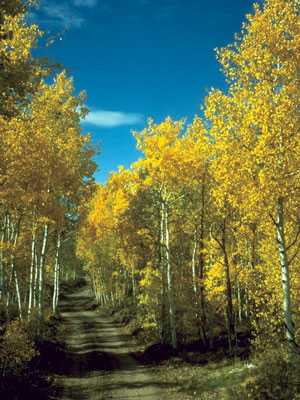

In [19]:
print(tree_dict[5])
#Quaking Aspen
#Populus tremuloides

Image("http://csfs.colostate.edu/media/sites/22/2016/04/Aspen-trees-path.jpg")

Douglas-fir


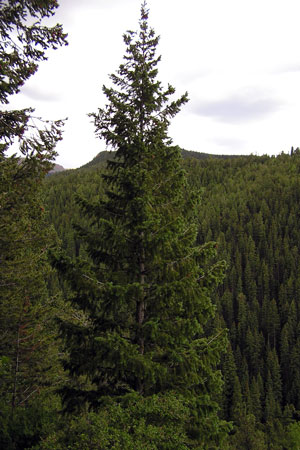

In [20]:
print(tree_dict[6])
#Pseudotsuga menziesii
Image("http://csfs.colostate.edu/media/sites/22/2014/02/Douglas-fir-treerevised.jpg")

Krummholz


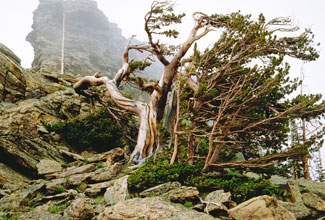

In [21]:
print(tree_dict[7])
Image('https://www.nps.gov/romo/learn/nature/images/Tree_LimberPine_325x220_2.jpg')

# Explore the wilderness areas

In [22]:
#create a dataframe with only wilderness areas and cover type
forest_wilderness = forest[wilderness_types + target]

# melt dataframe for plotting value counts 
melted_df = pd.melt(forest_wilderness, id_vars=['cover_type'],\
                    value_vars=['wilderness_area1', 'wilderness_area2','wilderness_area3', 'wilderness_area4'])

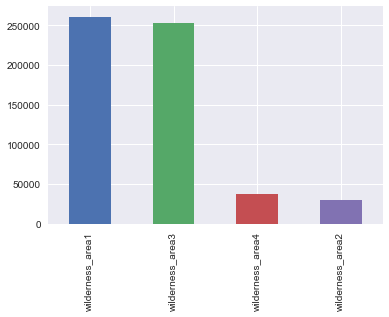

In [23]:
melted_df.variable[melted_df.value == 1].value_counts().plot(kind='bar');

# Easier way to go about making the same plot as above 
- Note the below plot is not sorted in order of higest counts

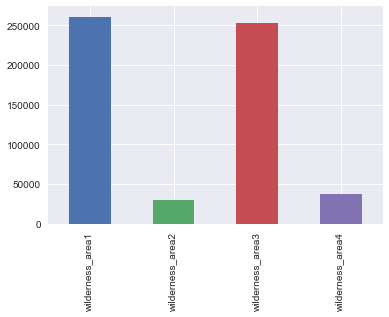

In [24]:
forest[wilderness_types].sum().plot(kind='bar');

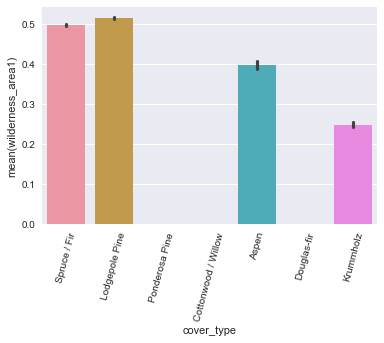

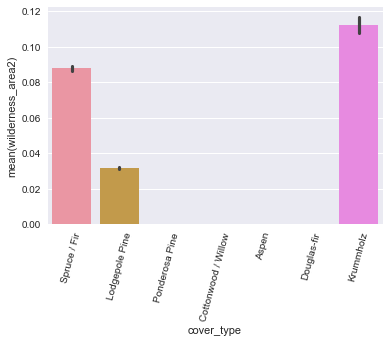

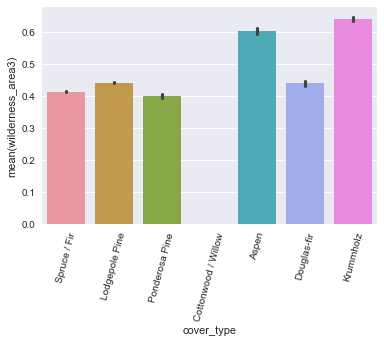

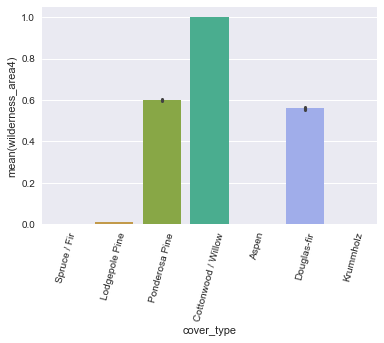

In [24]:
# plotting the percentage of tree types (y-axis) within each wilderness area 
for col in wilderness_types:
    sns.barplot(x="cover_type",y=col ,data=forest_wilderness).set_xticklabels(tree_val, rotation=75); 
    plt.show();

## From the above plots we see that the distribution of tree types within wilderness areas has high variability. 
- One tree type is exclusive to one wilderness area (Cottonwood/Willow --> wilderness area 4).
- While all others are in at least two wilderness areas. 
- Only Lodgepole Pine is found in all 4 wilderness areas. 

# From this point forward, will focus EDA (Exploratory Data Analysis) on only one tree type, Krummholz

In [25]:
#what the duece is a 'Krummholz'?
print(
'''
krumm·holz
ˈkro͝omhōlts/
noun
stunted windblown trees growing near the tree line on mountains.
'''
)


krumm·holz
ˈkro͝omhōlts/
noun
stunted windblown trees growing near the tree line on mountains.



Krummholz means "crooked wood". Trees at the $\textbf{upper limit}$ of their habitat range - $\textbf{11,700' (3566m)}$ are stunted and twisted due to high winds, snow, ice, short growing seasons, and $\textbf{shallow, poorly developed soils}$.

This is a transition zone between subalpine forest and alpine tundra, and an important refuge during storms for some mammals and birds who primarily live on tundra. Because bristlecone pine and limber pines grow extremely slowly, their small statures often belie true ages. Some are $\textbf{over 1000 years old}$.

https://www.nps.gov/grsa/learn/nature/naturalfeaturesandecosystems.htm

In [27]:
krummholz_select_features = forest[continuous_features + target].query("cover_type == 7")\
                                                                .rename(columns={'cover_type': 'krummholz'})
krummholz_select_features.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,krummholz
1654,3273,159,12,300,55,2863,233,242,138,2439,7
1655,3264,137,10,283,45,2773,236,236,131,2529,7
1656,3256,143,7,234,37,2713,231,239,140,2589,7
1662,3268,176,16,270,50,2955,227,247,148,2347,7
1663,3268,179,15,270,50,2925,225,248,151,2377,7


# Comparing boxplots of continous features for all tree types

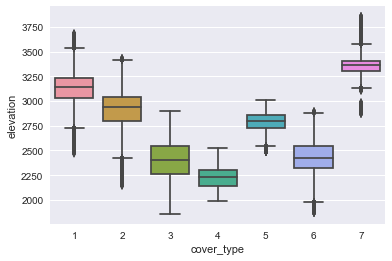

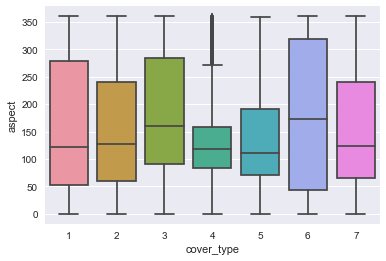

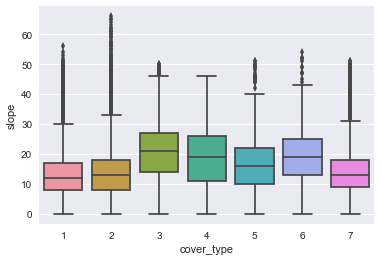

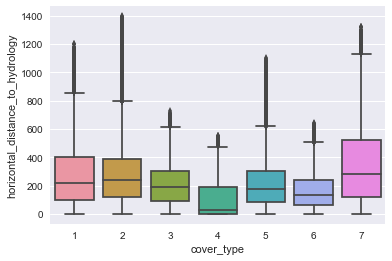

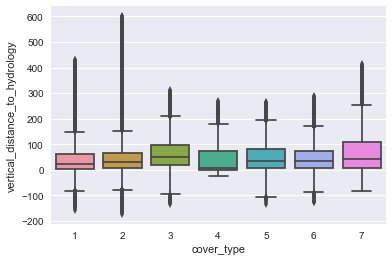

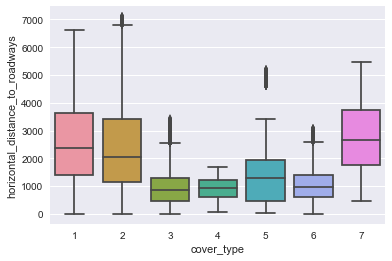

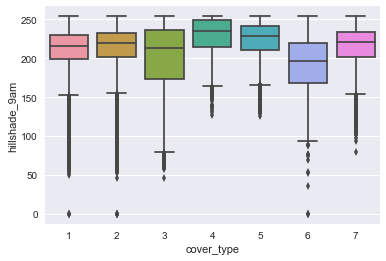

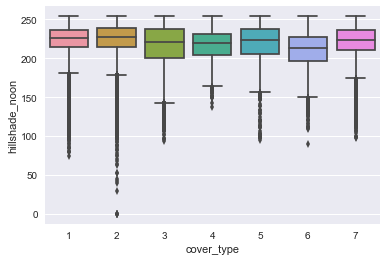

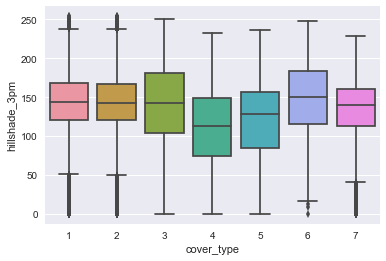

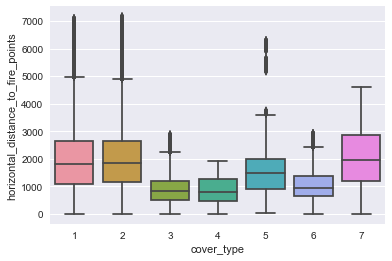

In [28]:
for col in continuous_features:
    sns.boxplot(x="cover_type",y=col ,data=forest_select_features)
    plt.show();

# Boxplots are showing quite a few "outiers" exist at the extremes. Violin plots may be better for comparison since they use KDE (Kernel Density Estimates)

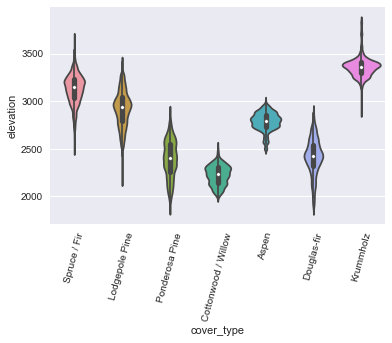

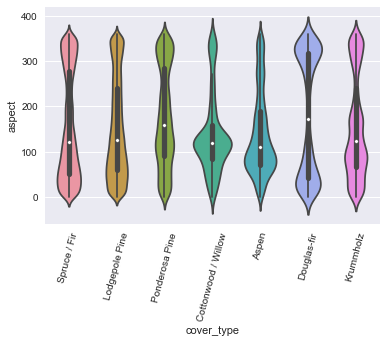

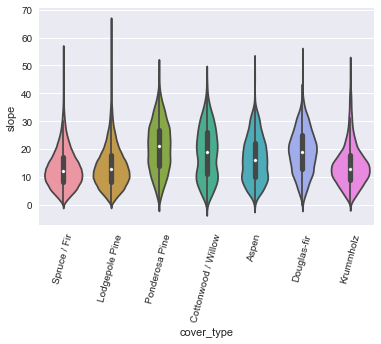

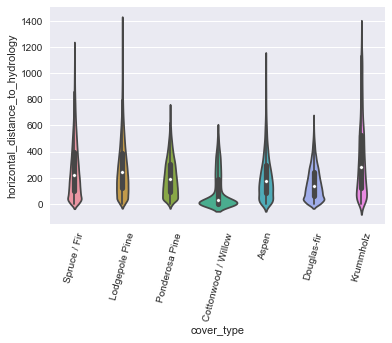

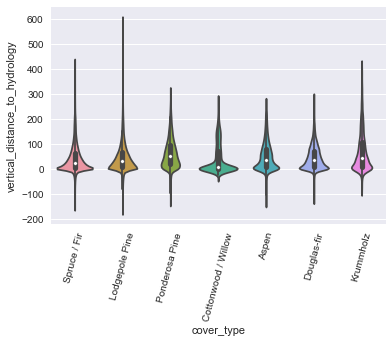

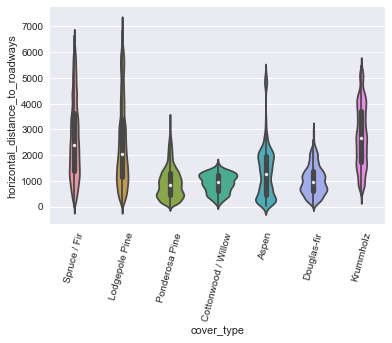

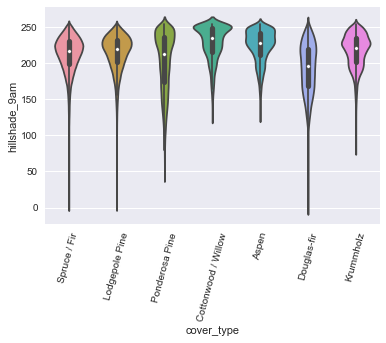

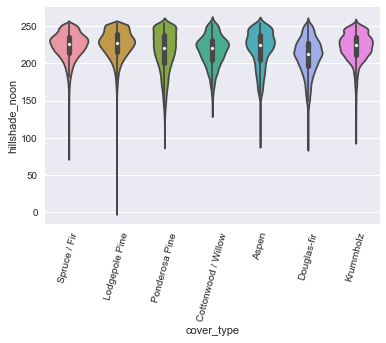

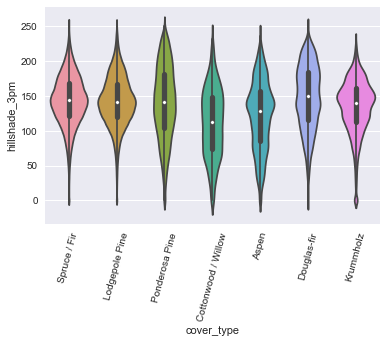

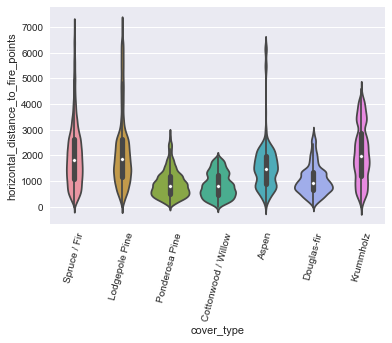

In [29]:
for col in continuous_features:
    sns.violinplot(x='cover_type', y=col, data=forest_select_features, scale='area')\
    .set_xticklabels(tree_val, rotation=75)
    plt.show();

# Comparing Distributions of all trees vs. Krummholz

/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


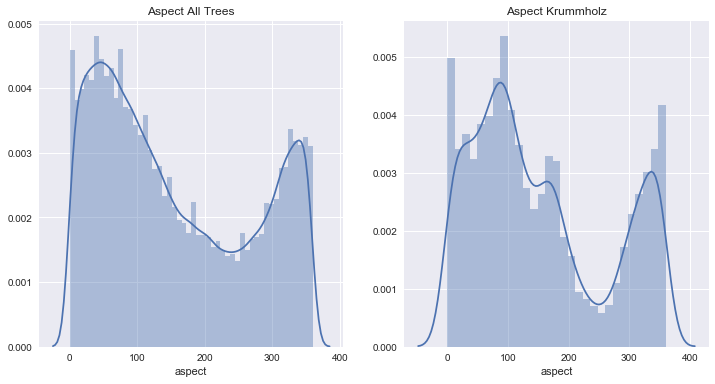

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Aspect All Trees')
ax2.set_title('Aspect Krummholz')

sns.distplot(forest_select_features['aspect'], ax=ax1);
sns.distplot(krummholz_select_features['aspect'], ax=ax2);

# Above plots show that the "continuous features" are bounded between 0 and 360 degrees. The same applies to the features: 
- [hillshade_9am, hillshade_noon, hillshade_3pm]
- slope is also bounded (0 - 90 degrees)

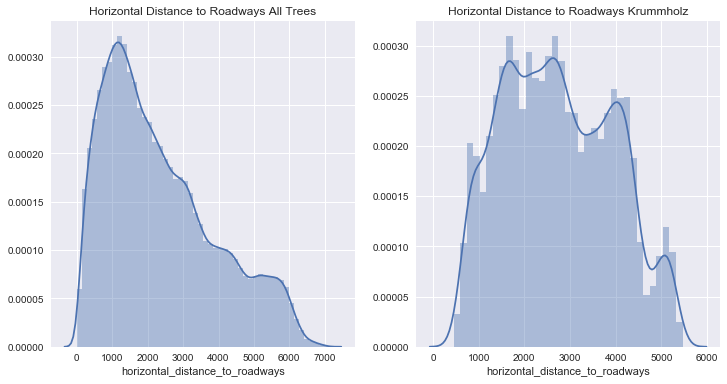

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Horizontal Distance to Roadways All Trees')
ax2.set_title('Horizontal Distance to Roadways Krummholz')

sns.distplot(forest_select_features['horizontal_distance_to_roadways'], ax=ax1);
sns.distplot(krummholz_select_features['horizontal_distance_to_roadways'], ax=ax2);

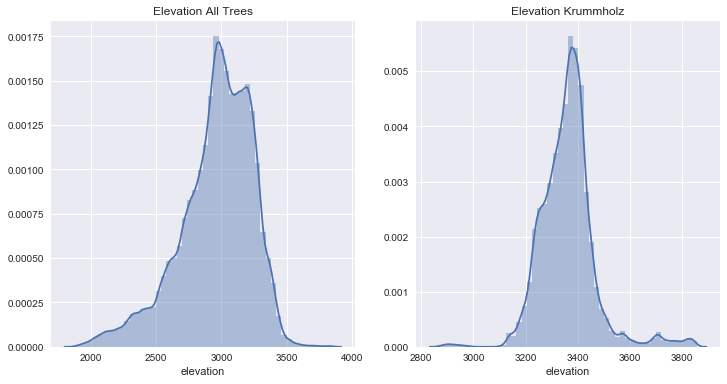

In [496]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Elevation All Trees')
ax2.set_title('Elevation Krummholz')

sns.distplot(forest_select_features['elevation'], ax=ax1);
# sns.distplot(forest_select_features['elevation'][forest_select_features.cover_type.isin(np.arange(1,7))], ax=ax1);
sns.distplot(krummholz_select_features['elevation'], ax=ax2);

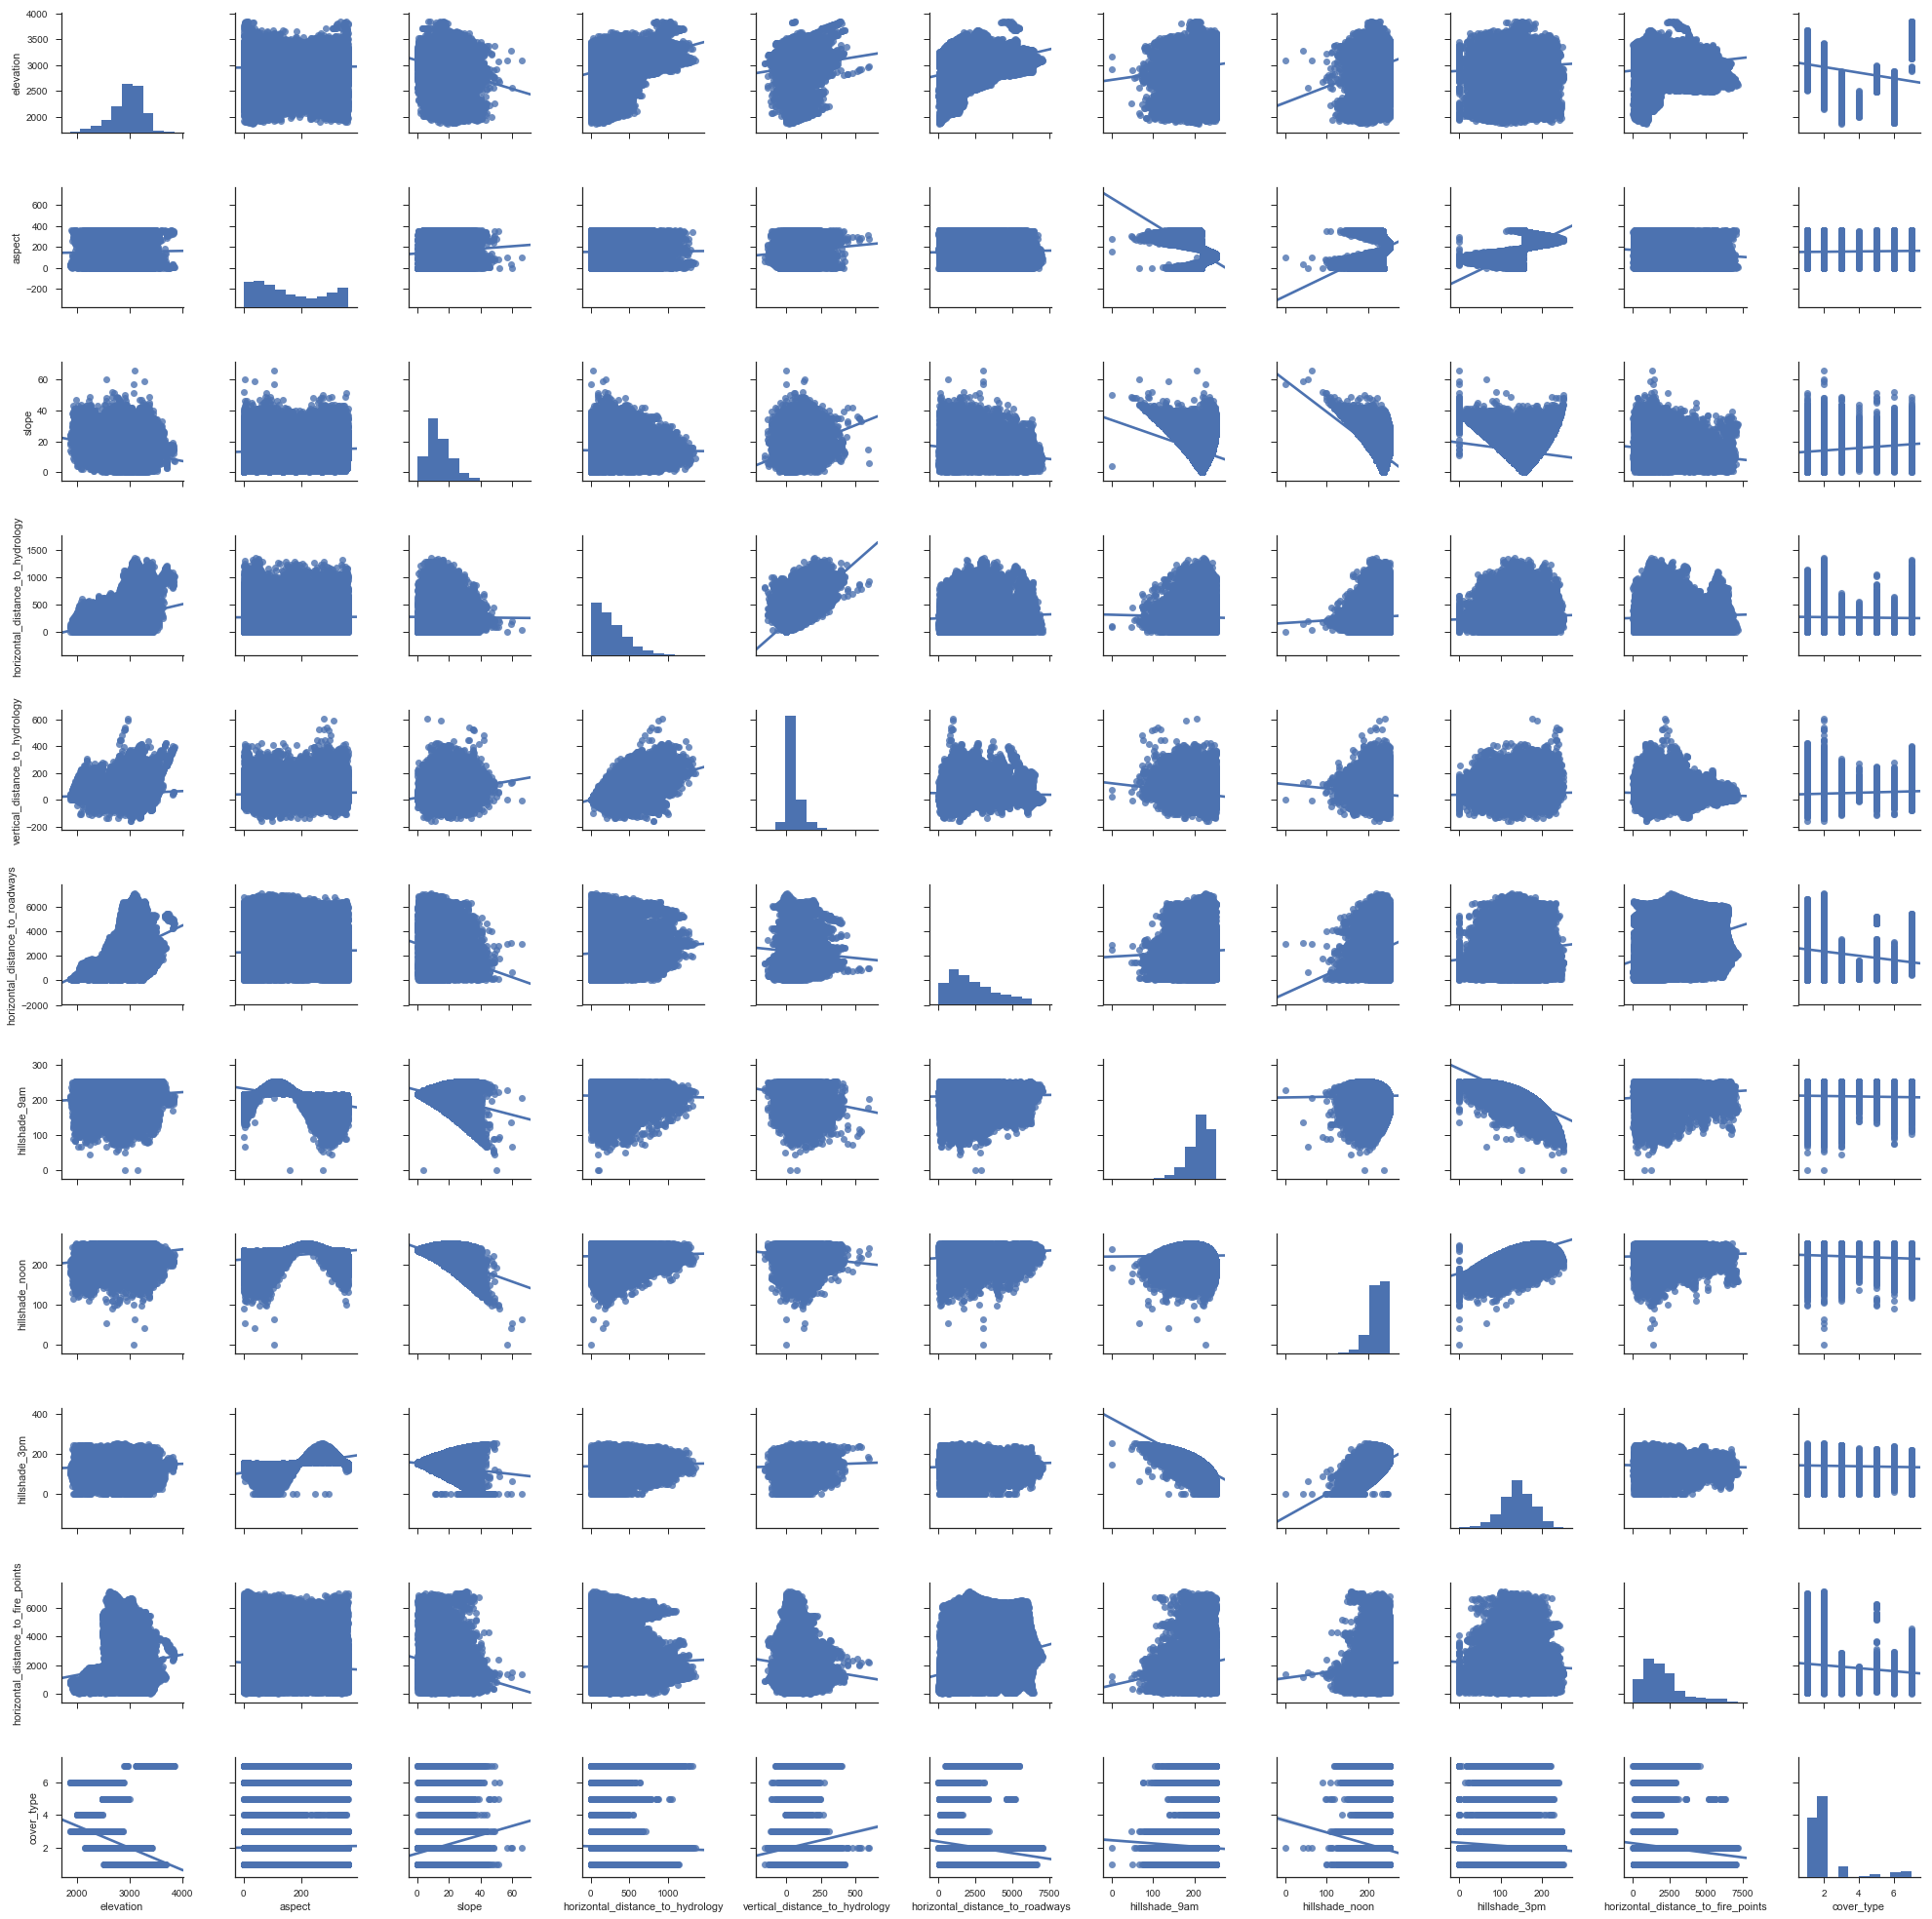

In [55]:
sns.pairplot(predict_variables, kind='reg'); # not the right idea, only leaving because it took 30 minutes to generate

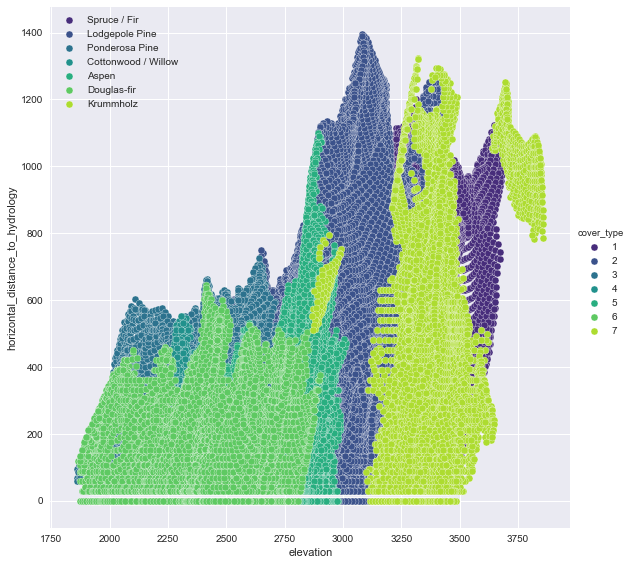

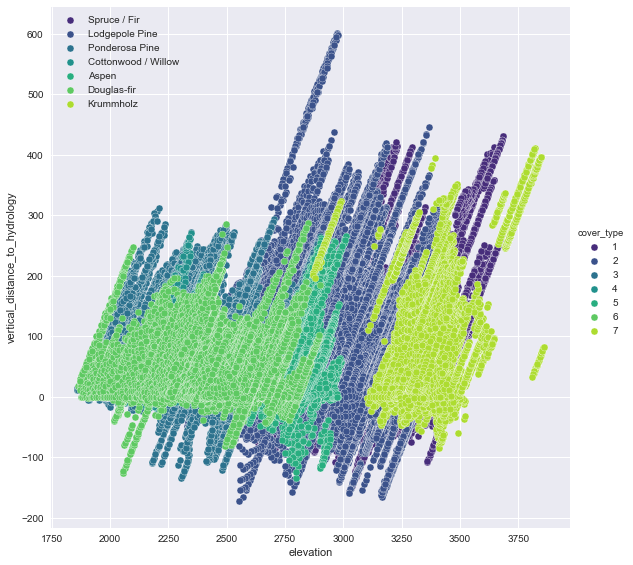

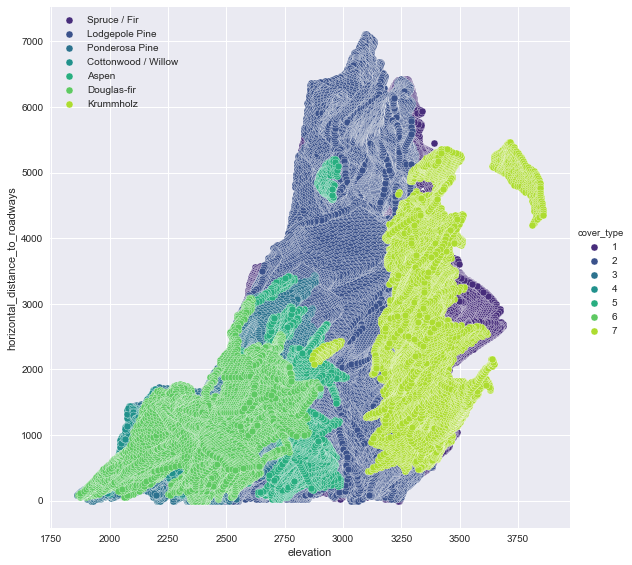

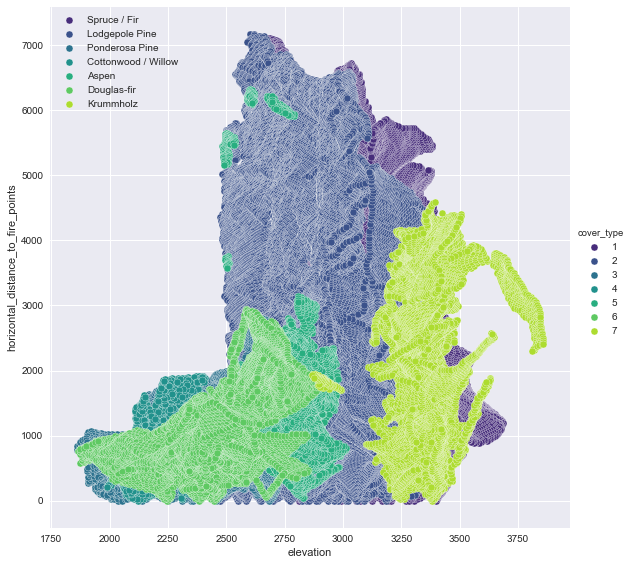

In [52]:
real_continuous_features = [col for col in continuous_features if "dist" in col]
for col in real_continuous_features:
    sns.pairplot(forest_select_features, hue="cover_type", size=8, palette="viridis",\
             x_vars="elevation", y_vars=col)
    plt.legend(tree_val, loc='upper left')
    plt.show();

# Fit a distribution to Elevation feature for Krummholz
## From previous plotting, we noticed a somewhat normal distribution with high kurtosis. 
## Lets try out a Double Laplacian distribution to see if it is a better fit

In [20]:
μ, σ = stats.norm.fit(krummholz_select_features['elevation'])
print(μ)
print(σ)

3361.92866894
106.912694129


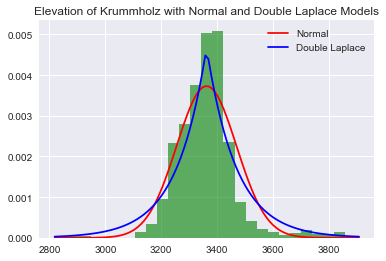

In [51]:
plt.hist(krummholz_select_features['elevation'], bins=25, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, μ, σ)
plt.plot(x, p, 'r')
p2 = stats.laplace.pdf(x, μ, σ)
plt.plot(x, p2, 'b')
plt.title("Elevation of Krummholz with Normal and Double Laplace Models")
plt.legend(['Normal', 'Double Laplace'], loc='upper right')
plt.show;

From the general description of a Krummholz tree we found that they are found at an elevation of: $\textbf{11,700' (3566m)}$

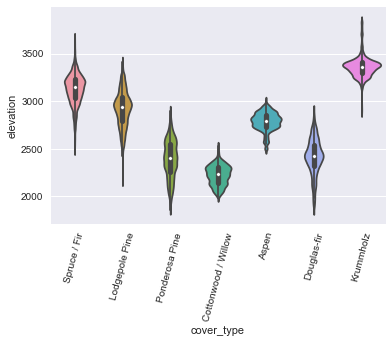

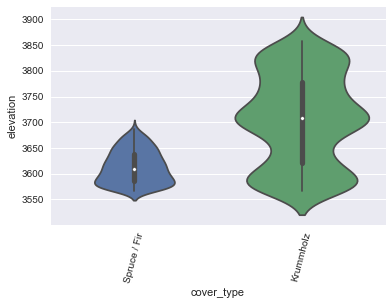

In [172]:
#show the distribution of all trees distribution based on elevation 
sns.violinplot(x='cover_type', y='elevation',\
               data=forest_select_features, scale='area').set_xticklabels(tree_val, rotation=75);
plt.show()

#all cover_types above 11,700 feet
sns.violinplot(x='cover_type', y='elevation',\
               data=forest_select_features[forest_select_features.elevation > 3566], scale='count')\
               .set_xticklabels([tree_val[0],tree_val[6]], rotation=75);

In [25]:
print("Percentage of Spruce/Fir that are above 11,700' (3566m) elevation = {:.2f}%"\
      .format((forest_select_features[forest_select_features.elevation > 3566].cover_type.value_counts()[1]\
                /forest_select_features.cover_type.value_counts()[1])*100))
print("Percentage of Krummholz that are above 11,700' (3566m) elevation = {:.2f}%"\
      .format((forest_select_features[forest_select_features.elevation > 3566].cover_type.value_counts()[7]\
                /forest_select_features.cover_type.value_counts()[7])*100))
print("Percentage of Spruce/Fir that are above 10,500' (3200m) elevation = {:.2f}%"\
      .format((forest_select_features[forest_select_features.elevation > 3200].cover_type.value_counts()[1]\
                /forest_select_features.cover_type.value_counts()[1])*100))
print("Percentage of Krummholz that are above 10,500' (3200m) elevation = {:.2f}%"\
      .format((forest_select_features[forest_select_features.elevation > 3200].cover_type.value_counts()[7]\
                /forest_select_features.cover_type.value_counts()[7])*100))

Percentage of Spruce/Fir that are above 11,700' (3566m) elevation = 0.22%
Percentage of Krummholz that are above 11,700' (3566m) elevation = 3.82%
Percentage of Spruce/Fir that are above 10,500' (3200m) elevation = 35.03%
Percentage of Krummholz that are above 10,500' (3200m) elevation = 96.57%


# Hypothesis Test

We want to test the null hypothesis ($H_0$), that the proportion of any type of tree in any soil type will be evenly distributed.  

$H_0: p(tree) = \frac{1}{40}$  $(= .025)$

against the alternative hypothesis ($H_1$), that the proportion of any type of tree in any soil type will not be evenly distributed.  

$H_1: p(tree) \neq \frac{1}{40}$  $(\neq .025)$

We set the significance level $ \alpha = 0.01$

The test method is a two-tail z-test for proportions 

To calculate this, we need to find the point estimate and standard error

Standard Error of Sample Proportion 

$SE = \sqrt{\frac{P(tree)\times(1 - P(tree))}{n}}$

In [53]:
#One of the Moran Family soil-types
soil_38_vals = [8729, 740, 0, 0, 0, 0, 6104]
       
total_counts = [forest.cover_type.value_counts()[n] for n in range(1,8)] #indexing each cover_type (1-7)

for i,j in enumerate(soil_38_vals):
    p = j
    n = total_counts[i]
    point_estimate = p/n
    SE = np.sqrt((point_estimate*(1 - point_estimate))/n)
    print(f"Point Estimate: {point_estimate:.2}")
    print(f"SE: {SE:.2}")

Point Estimate: 0.041
SE: 0.00043
Point Estimate: 0.0026
SE: 9.6e-05
Point Estimate: 0.0
SE: 0.0
Point Estimate: 0.0
SE: 0.0
Point Estimate: 0.0
SE: 0.0
Point Estimate: 0.0
SE: 0.0
Point Estimate: 0.3
SE: 0.0032


Next we find the Z-score

$Z = \frac{point_{est} - H_0}{SE}$

In [54]:
#rather than calculating the z-score by hand, we can wrap it in porportions_ztest 
for i,j in enumerate(soil_38_vals):
    p = j
    n = total_counts[i]
    tree_zscore, tree_pvalue = proportions_ztest(p, n, 0.025) #H_0 = .025
    print(f"Sample proportion: {p / n:.2}")
    print(f"z-score: {tree_zscore:.2}")
    print(f"p-value: {tree_pvalue:.2}")

Sample proportion: 0.041
z-score: 3.8e+01
p-value: 3.5e-308
Sample proportion: 0.0026
z-score: -2.3e+02
p-value: 0.0
Sample proportion: 0.0
z-score: -inf
p-value: 0.0
Sample proportion: 0.0
z-score: -inf
p-value: 0.0
Sample proportion: 0.0
z-score: -inf
p-value: 0.0
Sample proportion: 0.0
z-score: -inf
p-value: 0.0
Sample proportion: 0.3
z-score: 8.5e+01
p-value: 0.0


/Users/adamszabunio/anaconda/envs/stats/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:575: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


Since these p-values are very small, we reject the null hypothesis and have strong evidence in favor of the alternative hypothesis. 

The p-value in each case is $ < 0.01 = \alpha$, so we reject the null hypothesis in all cases. At the 1% level of significance, we did find sufficient evidence to conclude that the proportion of any type of tree in any soil type will be evenly distributed. 

____